## **Instalación de Liberías**
Se necesitará usar la libería *chembl_webresource_client*, necesaria para poder acceder a la base de datos de ChEMBL desde Python. Es necesario hacer uso del caracter admiración para usar los comandos mágicos a través de la consola de Unix.

In [5]:
# instalar versión específica de itsdangerous para evitar conflictos
!pip install itsdangerous==2.1.2
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 60 kB 7.8 MB/s 
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


## Importar las Librerías

In [6]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import seaborn as sb
# visualizar datos extensión collab
#data_table.enable_dataframe_formatter()
from google.colab import data_table
data_table.disable_dataframe_formatter()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings 
import re
import io
import matplotlib.cm as cm
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from numpy import corrcoef, transpose, arange

## **Base a utilizar: ChEMBL**
Se utilizarán datos recuperados de la base de datos ChEMBL. Para más información ver [*Base de Datos de ChEMBL*](https://www.ebi.ac.uk/chembl/)

Se busca en objetivos o 'targets' la primera enfermedad, en este caso será chagas desde ChEMBL [*Query chagas desde ChEMBL*](https://www.ebi.ac.uk/chembl/g/#search_results/targets/query=lymphoma)



Información recuperada el 15 de agosto de 2021.

In [31]:
chagas_trg = new_client.target
chagas_trgt_query = chagas_trg.search('trypanosoma') #leishmania entrada [3] lymphoma trypanosoma alzheimer
chagas_trgs = pd.DataFrame.from_dict(chagas_trgt_query)
chagas_trgs


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Trypanosoma,Trypanosoma,16.0,True,CHEMBL612883,[],ORGANISM,5690
1,[],Trypanosoma brucei,Trypanosoma brucei,14.0,False,CHEMBL612849,[],ORGANISM,5691
2,[],Trypanosoma cruzi,Trypanosoma cruzi,14.0,False,CHEMBL368,[],ORGANISM,5693
3,[],Trypanosoma evansi,Trypanosoma evansi,14.0,False,CHEMBL1075362,[],ORGANISM,5697
4,[],Trypanosoma lewisi,Trypanosoma lewisi,14.0,False,CHEMBL2366781,[],ORGANISM,5695
...,...,...,...,...,...,...,...,...,...
69,[],Trypanosoma cruzi,Phosphodiesterase,7.0,False,CHEMBL4523319,"[{'accession': 'Q53I60', 'component_descriptio...",SINGLE PROTEIN,5693
70,[],Trypanosoma cruzi (strain CL Brener),Histidine--tRNA ligase,7.0,False,CHEMBL4662925,"[{'accession': 'Q4DA54', 'component_descriptio...",SINGLE PROTEIN,353153
71,[],Trypanosoma cruzi (strain CL Brener),"Tyrosyl-tRNA synthetase, putative",7.0,False,CHEMBL4662926,"[{'accession': 'Q4DSP6', 'component_descriptio...",SINGLE PROTEIN,353153
72,[],Trypanosoma cruzi,Proteasome subunit beta,7.0,False,CHEMBL4662930,"[{'accession': 'O96673', 'component_descriptio...",SINGLE PROTEIN,5693


In [32]:
#chagas_trgs = chagas_trgs[chagas_trgs.organism == 'Homo sapiens']
#chagas_trgs.head(3) #chagas_trgs.head(10)

In [33]:
print('Total registros: ', chagas_trgs.size, ' Dimension: ', chagas_trgs.shape)

Total registros:  666  Dimension:  (74, 9)


Se asigna la quinta entrada (que corresponde a la enfermedad objetivo) a la variable ***selected_target***

In [34]:
#se prueban 4 primeras sin resultados asociados.
chembl_trg = chagas_trgs.target_chembl_id[2]  #chagas_trgs.target_chembl_id[5] 
chembl_trg

'CHEMBL368'

Es necesario filtrar la información para que solo recupere datos con bioactividad IC50 para la primera enfermedad **target_chembl_id = 'CHEMBL4247'** que se muestran como valor de pChEMBL

In [35]:
activity = new_client.activity
res_ic50 = activity.filter(target_chembl_id = chembl_trg).filter(standard_type="IC50")

Se convierte el array **res_ic50** resultado del comando anterior  en *DataFrame* de Pandas 

In [37]:
df = pd.DataFrame.from_dict(res_ic50)
df.shape

(14466, 45)

In [38]:
df.to_csv('chagas_res_1.csv', index=False)
df['standard_value']

0        70000.0
1           None
2        70000.0
3        65800.0
4        70000.0
          ...   
14461     9100.0
14462    22400.0
14463     1200.0
14464      400.0
14465     5400.0
Name: standard_value, Length: 14466, dtype: object

Ver nombre de Columnas

In [39]:
# for col in df.columns:
#     print(col)
df.dtypes   

activity_comment              object
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession       object
assay_variant_mutation        object
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                float64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name            object
parent_molecule_chembl_id     object
pchembl_value                 object
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
src_id                         int64
s

## **Proceso KDD**
Se eliminan registros vacíos en la columna **standard_value** y **canonical_smiles**.

In [40]:
df.shape

(14466, 45)

In [41]:
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df.shape

(13617, 45)

Se verifica la cantidad de registros únicos y luego se eliminan los duplicados

In [42]:
len(df.canonical_smiles.unique())
df2_kdd = df.drop_duplicates(['canonical_smiles'])
df2_kdd

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,149705,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
2,None,150914,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
4,None,150917,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
6,None,154598,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,50.0
8,None,155815,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14447,None,23295790,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,23.3
14448,None,23295791,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,7.4
14449,None,23295792,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,11.1
14450,None,23295793,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,24.8


In [43]:
df2_kdd.to_csv('matriz')
df2_kdd.pchembl_value.fillna(value=np.nan, inplace=True)

df2_kdd['pchembl_value'] = df2_kdd['pchembl_value'].fillna(0)
df2_kdd['potential_duplicate'] = df2_kdd['potential_duplicate'].fillna(0)

df2_kdd['document_year'] = df2_kdd['document_year'].fillna(2006)
df2_kdd['potential_duplicate'] = df2_kdd['potential_duplicate'].fillna(0)
df2_kdd['src_id'] = df2_kdd['src_id'].fillna(0)
df2_kdd['standard_flag'] = df2_kdd['standard_flag'].fillna(0)
df2_kdd['standard_value'] = df2_kdd['standard_value'].fillna(df2_kdd.mean())
df2_kdd['value'] = df2_kdd['value'].fillna(df2_kdd.mean())

#	df.fillna(df.mean())

df2_kdd






#df2_kdd['pchembl_value'].fillna(df2_kdd['pchembl_value'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,149705,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
2,None,150914,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
4,None,150917,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
6,None,154598,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,50.0
8,None,155815,[],CHEMBL820654,Inhibitory concentration against Trypanosoma c...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14447,None,23295790,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,23.3
14448,None,23295791,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,7.4
14449,None,23295792,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,11.1
14450,None,23295793,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4840635,Antiprotozoal activity against Trypanosoma cru...,F,None,None,BAO_0000190,BAO_0000218,...,Trypanosoma cruzi,Trypanosoma cruzi,5693,None,None,IC50,uM,UO_0000065,None,24.8


## Análisis de correlación

In [44]:
columnas = df2_kdd[ (df2_kdd.columns).drop(['canonical_smiles', 'assay_chembl_id', 'assay_type', 'assay_description', 'activity_properties', 'activity_comment', 'activity_comment', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'qudt_units', 'record_id', 'relation', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value']) ].columns #upper_value

df2_kdd[columnas].isnull().any()
#columnas.isnull().any()

dft = df2_kdd[columnas].T

names =  dft.index
names


#dft = dft.applymap(str)


# #https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
#R = corrcoef(dft)

# # http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# # Generate a mask for the upper triangle
# sns.set(style="white")
# mask = np.zeros_like(R, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(200, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
#             square=True, xticklabels=names, yticklabels=names,
#             linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Index(['activity_id', 'document_year', 'pchembl_value', 'potential_duplicate',
       'src_id', 'standard_flag', 'standard_value', 'value'],
      dtype='object')

Se unen las columnas más importantes en un solo dataset

In [45]:
select_col = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_kdd[select_col]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL280463,CCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0
2,CHEMBL110971,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,70000.0
4,CHEMBL109374,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,70000.0
6,CHEMBL109948,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,50000.0
8,CHEMBL111392,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0
...,...,...,...
14447,CHEMBL4854457,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,23300.0
14448,CHEMBL4867967,O=C(CCn1ccnc1)c1ccc(F)c2ccccc12,7400.0
14449,CHEMBL4863983,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,11100.0
14450,CHEMBL4866134,O=C(CCn1cnc2ccccc21)C12CC3CC(CC(C3)C1)C2,24800.0


Ejemplo de verificación de diagrama de la segunda molécula

In [46]:
!pip install rdkit
from rdkit import Chem
molecula_0 = Chem.MolFromSmiles(df['canonical_smiles'][0])

print(df['canonical_smiles'][0])
molecula_0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 474 kB/s 


CCCCCC(P(=O)(O)O)P(=O)(O)O


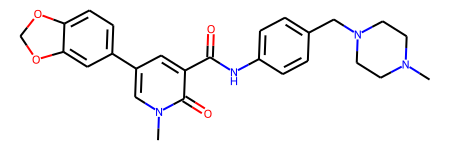

#Resetear índices

In [47]:
df3.reset_index()
df3.to_csv('chagas_02_bioactivity_data_preprocessed.csv', index=False)

In [48]:
df4 = pd.read_csv('chagas_02_bioactivity_data_preprocessed.csv')

### **Categorizar compuestos**
Los datos de bioactividad, consignados en la columna standard_value, están en unidades de IC50. Se clasifican estos valores en tres categorías. Los compuestos que tengan valores inferiores a 1.000 nM se considerarán **‘activos’**, Los valores entre 1.000 nM y 10.000 nM tendrán una categoría **‘NaN’** debido a que no se utilizarán, mientras que los valores superiores a 10.000 nM se considerarán **‘inactivos**’.

In [49]:
import numpy as np

df4['valor_bioactividad'] = ''
df4['valor_bioactividad'] = np.where(df4['standard_value'] >= 10000, 'inactivo', np.where(df4['standard_value'] <= 1000, 'activo','NA' ))
df4 = df4[(df4.valor_bioactividad == 'activo') | (df4.valor_bioactividad == 'inactivo')]
#reemplazar ceros con valor más pequeño
df4['standard_value'] = df4['standard_value'].replace(0.0, 0.06)
df4
#df4.drop(columns=['rango'])

,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,CHEMBL280463,CCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
1,CHEMBL110971,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
2,CHEMBL109374,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,70000.0,inactivo
3,CHEMBL109948,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,50000.0,inactivo
4,CHEMBL111392,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
...,...,...,...,...
8707,CHEMBL4878985,Cc1ccccc1C(=O)CCn1ccnc1,21400.0,inactivo
8708,CHEMBL4853502,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,21600.0,inactivo
8709,CHEMBL4854457,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,23300.0,inactivo
8711,CHEMBL4863983,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,11100.0,inactivo


In [50]:
df.to_csv('re')

## Análisis de correlación

In [51]:
df4.to_csv('chagas_03_bioactivity_data_curated.csv', index=False)

## PARTE 2: **Instalación de conda**

In [52]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-03 03:35:05--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   117MB/s    in 0.7s    

2022-10-03 03:35:06 (117 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [53]:
#@title
df = pd.read_csv('chagas_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,CHEMBL280463,CCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
1,CHEMBL110971,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
2,CHEMBL109374,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,70000.0,inactivo
3,CHEMBL109948,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,50000.0,inactivo
4,CHEMBL111392,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,70000.0,inactivo
...,...,...,...,...
7044,CHEMBL4878985,Cc1ccccc1C(=O)CCn1ccnc1,21400.0,inactivo
7045,CHEMBL4853502,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,21600.0,inactivo
7046,CHEMBL4854457,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,23300.0,inactivo
7047,CHEMBL4863983,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,11100.0,inactivo


Eliminar columna *canonical_smiles*

In [54]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [55]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [56]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles
0,CHEMBL280463,70000.0,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O
1,CHEMBL110971,70000.0,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O
2,CHEMBL109374,70000.0,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC
3,CHEMBL109948,50000.0,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC
4,CHEMBL111392,70000.0,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...
7044,CHEMBL4878985,21400.0,inactivo,Cc1ccccc1C(=O)CCn1ccnc1
7045,CHEMBL4853502,21600.0,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1
7046,CHEMBL4854457,23300.0,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1
7047,CHEMBL4863983,11100.0,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1


Calcular descriptores de Lipinski
Christopher Lipinski, un científico de Pfizer, ideó un conjunto de reglas empíricas para evaluar la similitud de los compuestos con las drogas. Tal semejanza con las drogas se basa en la Absorción, Distribución, Metabolismo y Excreción (ADME), que también se conoce como perfil farmacocinético. Lipinski analizó todos los medicamentos activos por vía oral aprobados por la FDA en la formulación de lo que se conocerá como la regla de los cinco o la regla de Lipinski.

La Regla de Lipinski establecía lo siguiente:

Peso molecular < 500 Dalton
Coeficiente de reparto octanol-agua (LogP) < 5
Donantes de enlaces de hidrógeno < 5
Aceptores de enlaces de hidrógeno < 10

In [57]:
"""
Lipinski:
    Moleculer Weight <= 500
    LogP <= 5
    H-Bond Donor Count <= 5
    H-Bond Acceptor Count <= 10
"""

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Creación de la Función de Lipinski

In [58]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["Peso_Molecular","LogP","Num_Donadores_H","Num_Aceptores"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [59]:
df_clean_smiles.canonical_smiles

0                     CCCCCC(P(=O)(O)O)P(=O)(O)O
1               CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O
2               CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC
3           CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC
4                 CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O
                          ...                   
7044                     Cc1ccccc1C(=O)CCn1ccnc1
7045        O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1
7046               O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1
7047        COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1
7048    O=C(CCn1cnc2ccccc21)C12CC3CC(CC(C3)C1)C2
Name: canonical_smiles, Length: 7049, dtype: object

In [60]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores
0,246.136,1.24820,4.0,2.0
1,304.216,1.73850,5.0,3.0
2,330.298,4.64480,0.0,6.0
3,386.406,6.20520,0.0,6.0
4,302.244,2.80860,4.0,2.0
...,...,...,...,...
7044,214.268,2.46452,0.0,3.0
7045,245.238,2.06430,0.0,5.0
7046,252.676,2.94860,0.0,3.0
7047,310.353,3.32650,0.0,5.0


### **Unión de datasets**

Se unen los datasets

In [61]:
df_combined = pd.concat([df_clean_smiles ,df_lipinski], axis=1)  #df_combined = pd.concat([df ,df_lipinski], axis=1) 
df_combined

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores
0,CHEMBL280463,70000.0,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.24820,4.0,2.0
1,CHEMBL110971,70000.0,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,304.216,1.73850,5.0,3.0
2,CHEMBL109374,70000.0,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,330.298,4.64480,0.0,6.0
3,CHEMBL109948,50000.0,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,386.406,6.20520,0.0,6.0
4,CHEMBL111392,70000.0,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,302.244,2.80860,4.0,2.0
...,...,...,...,...,...,...,...,...
7044,CHEMBL4878985,21400.0,inactivo,Cc1ccccc1C(=O)CCn1ccnc1,214.268,2.46452,0.0,3.0
7045,CHEMBL4853502,21600.0,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,245.238,2.06430,0.0,5.0
7046,CHEMBL4854457,23300.0,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,252.676,2.94860,0.0,3.0
7047,CHEMBL4863983,11100.0,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,310.353,3.32650,0.0,5.0


### **Convertir IC50 a pIC50**
Para permitir que los datos de **IC50** se distribuyan de manera más uniforme, convertiremos **IC50** a la escala logarítmica negativa que es esencialmente **-log10(IC50)**.

Esta función pIC50() recibe el dataset como parámetro de entrada.
* Toma el valor de IC50 desde la columna ``standard_value`` y la convierte desde nM a M y luego multiplica el valor por 10$^{-9}$
* Toma el valor molar y luego aplica el -log10
* Se borra la columna ``standard_value`` y se reemplaza por la columna ``pIC50``

In [62]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_pic50']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_pic50', 1)
        
    return x

In [63]:
df_combined.standard_value.describe()

count    7.049000e+03
mean     8.031167e+04
std      4.356837e+05
min      5.700000e-02
25%      1.000000e+02
50%      1.510000e+04
75%      5.011872e+04
max      1.740700e+07
Name: standard_value, dtype: float64

In [64]:
#Los valores superiores a 100 000 000 se fijarán en 100 000 000; de lo contrario, el valor logarítmico negativo se volverá negativo.
-np.log10( (10**-9)* 100000000 )
-np.log10( (10**-9)* 100000000 )

1.0

In [65]:
def normalizar_pic50(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_pic50'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Primero aplicaremos la función norm_value() para que los valores en la columna standard_value se normalicen.

In [66]:
df_pic50 = normalizar_pic50(df_combined)
df_pic50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,standard_value_pic50
0,CHEMBL280463,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.24820,4.0,2.0,70000.0
1,CHEMBL110971,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,304.216,1.73850,5.0,3.0,70000.0
2,CHEMBL109374,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,330.298,4.64480,0.0,6.0,70000.0
3,CHEMBL109948,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,386.406,6.20520,0.0,6.0,50000.0
4,CHEMBL111392,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,302.244,2.80860,4.0,2.0,70000.0
...,...,...,...,...,...,...,...,...
7044,CHEMBL4878985,inactivo,Cc1ccccc1C(=O)CCn1ccnc1,214.268,2.46452,0.0,3.0,21400.0
7045,CHEMBL4853502,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,245.238,2.06430,0.0,5.0,21600.0
7046,CHEMBL4854457,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,252.676,2.94860,0.0,3.0,23300.0
7047,CHEMBL4863983,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,310.353,3.32650,0.0,5.0,11100.0


In [67]:
df_pic50.standard_value_pic50.describe()

count    7.049000e+03
mean     8.031167e+04
std      4.356837e+05
min      5.700000e-02
25%      1.000000e+02
50%      1.510000e+04
75%      5.011872e+04
max      1.740700e+07
Name: standard_value_pic50, dtype: float64

In [68]:
df_final = pIC50(df_pic50)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL280463,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.24820,4.0,2.0,4.154902
1,CHEMBL110971,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,304.216,1.73850,5.0,3.0,4.154902
2,CHEMBL109374,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,330.298,4.64480,0.0,6.0,4.154902
3,CHEMBL109948,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,386.406,6.20520,0.0,6.0,4.301030
4,CHEMBL111392,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,302.244,2.80860,4.0,2.0,4.154902
...,...,...,...,...,...,...,...,...
7044,CHEMBL4878985,inactivo,Cc1ccccc1C(=O)CCn1ccnc1,214.268,2.46452,0.0,3.0,4.669586
7045,CHEMBL4853502,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,245.238,2.06430,0.0,5.0,4.665546
7046,CHEMBL4854457,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,252.676,2.94860,0.0,3.0,4.632644
7047,CHEMBL4863983,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,310.353,3.32650,0.0,5.0,4.954677


In [69]:
df_final.pIC50.describe()

count    7049.000000
mean        5.595936
std         1.673462
min         1.759276
25%         4.300000
50%         4.821023
75%         7.000000
max        10.244125
Name: pIC50, dtype: float64

In [70]:
df_final.to_csv('chagas_04_bioactivity_data_3class_pIC50.csv')

### **Eliminar valores NaN de la columna valor_bioactividad**
Aquí, eliminaremos el valor ``NaN`` de nuestro conjunto de datos.

In [71]:
df2 = df_final.dropna()
df2.reset_index()
df2.to_csv('prueba_1.csv', index = False)
df2

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL280463,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.24820,4.0,2.0,4.154902
1,CHEMBL110971,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,304.216,1.73850,5.0,3.0,4.154902
2,CHEMBL109374,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,330.298,4.64480,0.0,6.0,4.154902
3,CHEMBL109948,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,386.406,6.20520,0.0,6.0,4.301030
4,CHEMBL111392,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,302.244,2.80860,4.0,2.0,4.154902
...,...,...,...,...,...,...,...,...
7044,CHEMBL4878985,inactivo,Cc1ccccc1C(=O)CCn1ccnc1,214.268,2.46452,0.0,3.0,4.669586
7045,CHEMBL4853502,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,245.238,2.06430,0.0,5.0,4.665546
7046,CHEMBL4854457,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,252.676,2.94860,0.0,3.0,4.632644
7047,CHEMBL4863983,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,310.353,3.32650,0.0,5.0,4.954677


In [72]:
df2.to_csv('chagas_05_bioactivity_data_2class_pIC50.csv')

## **Análisis de datos exploratorios (Análisis del espacio químico) a través del descriptor de Lipinski**

In [73]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Diagrama de frecuencias para las dos categorías**


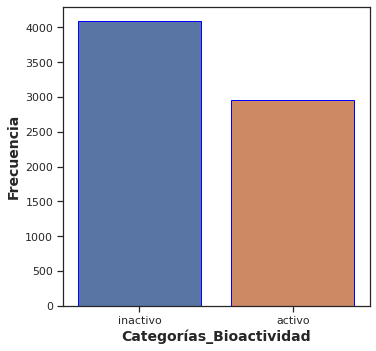

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='valor_bioactividad', data=df2, edgecolor='blue') #facecolor='blue'

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')

plt.savefig('grafica_categorias_bioactividad.pdf')

([<matplotlib.patches.Wedge at 0x7f5ac7211150>,
 [Text(-0.2752584758714057, 1.0650036485669667, 'inactivo'),
  Text(0.27525847587140534, -1.0650036485669667, 'activo')],
 [Text(-0.15014098683894853, 0.5809110810365272, '58.1%'),
  Text(0.15014098683894833, -0.5809110810365272, '41.9%')])

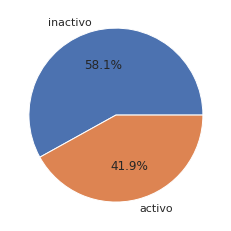

In [75]:
#Se construye un pie para establecer el porcentaje de cada catergoría en las clases 
#Se definen los totales para cada categoría 
inactive=4092
active=2957
conteos=[inactive,active]
clase=['inactivo','activo']
plt.pie(conteos,labels=clase,startangle=0,autopct='%1.1f%%')

### **Diagrama de puntos Peso_Molecular vs LogP**

Puede verse que las 2 categorías de bioactividad abarcan espacios químicos similares, como lo demuestra el diagrama de dispersión de Peso_Molecular frente a LogP.

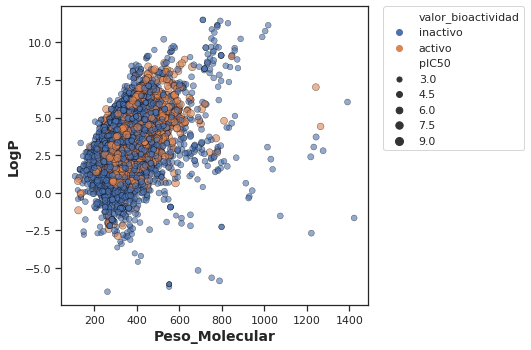

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='Peso_Molecular', y='LogP', data=df2, hue='valor_bioactividad', size='pIC50', edgecolor='black', alpha=0.6, facecolor = 'red')

plt.xlabel('Peso_Molecular', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_Peso_Molecular_vs_LogP.pdf')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


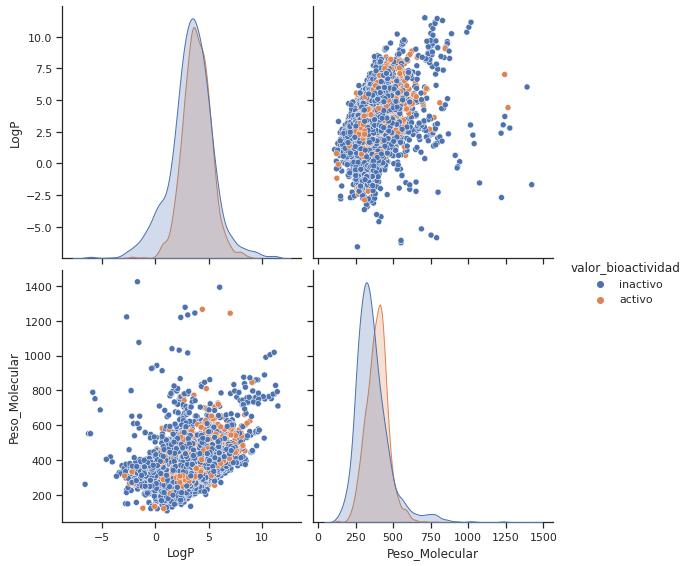

In [77]:
sb.pairplot(df2.dropna(),hue='valor_bioactividad',size=4,vars=["LogP","Peso_Molecular"],kind="scatter")

### **Box plots**
#### **PIC50**

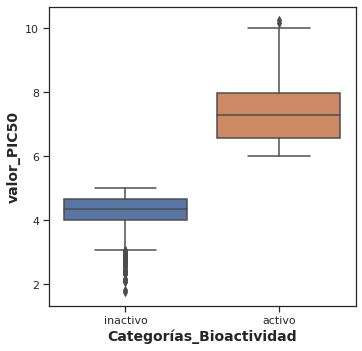

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'pIC50', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold', )
plt.ylabel('valor_PIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [79]:
#histogramas para la variable MW
#Ahora se procede a contruir los ejes
#número de breaks en el histograma
df_2_activo = df2[df2['valor_bioactividad']=='activo']
df_2_inactivo = df2[df2['valor_bioactividad']=='inactivo']

#### **Peso_Molecular**

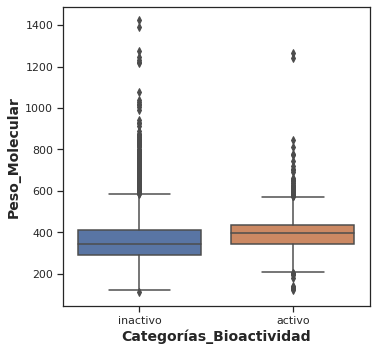

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Peso_Molecular', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Peso_Molecular', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

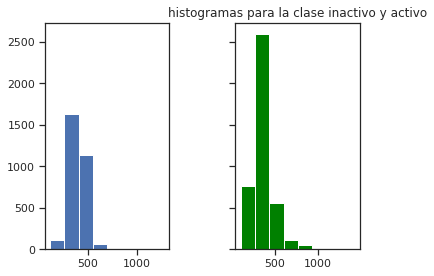

In [81]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Peso_Molecular'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Peso_Molecular'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo', loc='center')
plt.show()

#### **LogP**

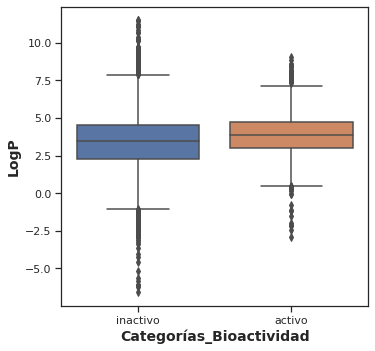

In [82]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'LogP', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

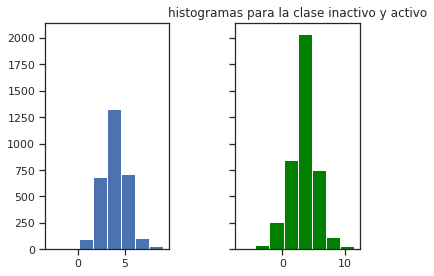

In [83]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['LogP'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['LogP'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

#### **Num_Donadores_Hidrógeno**

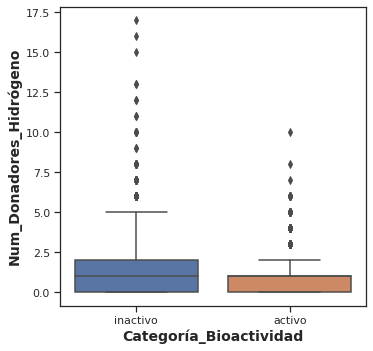

In [84]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Num_Donadores_H', data = df2)

plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Num_Donadores_Hidrógeno', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

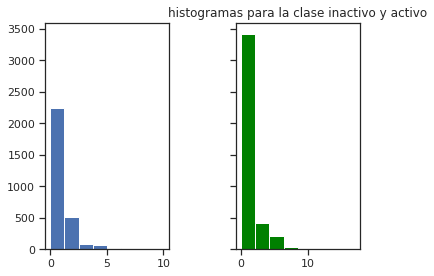

In [85]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Num_Donadores_H'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Num_Donadores_H'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

#### **Num_Aceptores**

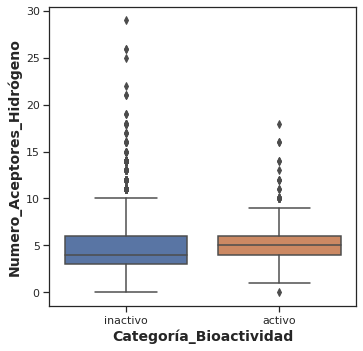

In [86]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Num_Aceptores', data = df2)

plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Numero_Aceptores_Hidrógeno', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

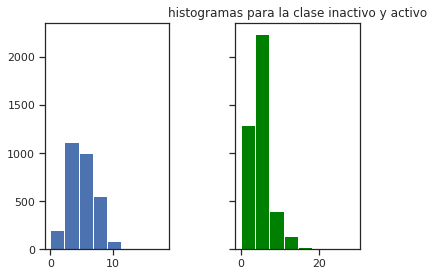

In [87]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Num_Aceptores'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Num_Aceptores'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

In [88]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
        #print(df2)
ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'STATUS' : STATUS,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['molecule_chembl_id','STATUS','MW','LogP','nHAcc','nHDon']]


In [89]:
df2.head(1)

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL280463,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.2482,4.0,2.0,4.154902


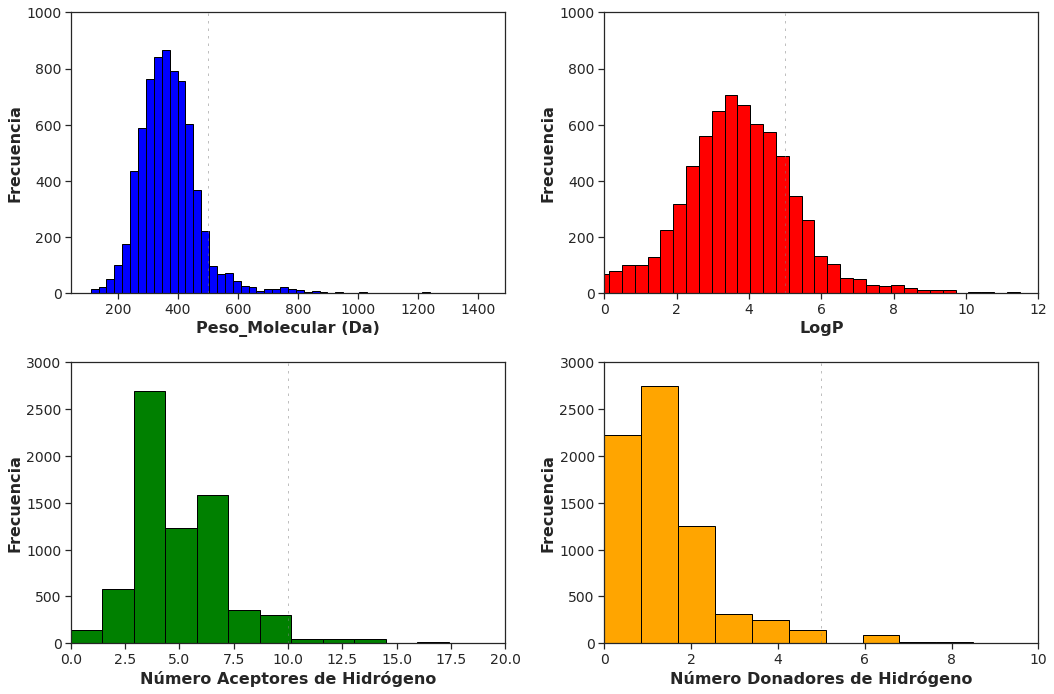

In [90]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histograma para MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Peso_Molecular (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 1000)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(0,12)
plt2.set_ylim(0,1000)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para nHDon
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Número Donadores de Hidrógeno', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(0,10)
plt4.set_ylim(0,3000)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Número Aceptores de Hidrógeno', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(0,20)
plt3.set_ylim(0,3000)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

In [91]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

print(nHDon)

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'valor_bioactividad' : STATUS,
     'Peso_Molecular': MW, 
     'LogP': LogP,
     'Num_Aceptores': nHAcc,
     'Num_Donadores_H': nHDon
    })
#data = data[['molecule_chembl_id','valor_bioactividad','MW','LogP','nHAcc','nHDon']]


#data.to_csv('SubFiles/ER_alpha_train_RO5.csv', sep=',' ,index=False)

[4, 5, 0, 0, 4, 4, 5, 5, 5, 5, 0, 4, 5, 5, 0, 0, 4, 0, 0, 4, 0, 4, 4, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 3, 0, 4, 3, 0, 1, 4, 0, 4, 6, 3, 2, 0, 0, 5, 2, 1, 5, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 6, 4, 5, 6, 6, 4, 4, 4, 4, 4, 2, 4, 4, 4, 6, 2, 5, 6, 5, 6, 6, 5, 5, 1, 5, 5, 5, 5, 5, 6, 6, 6, 6, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 4, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

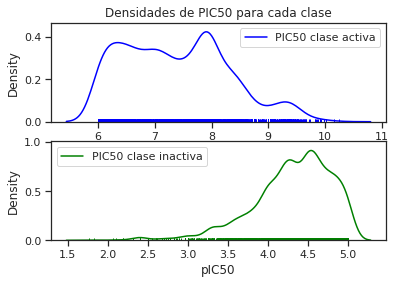

In [92]:
#Gráficas de densidad para cada medición PIC50 (Estimación Kernel)
plt.figure()
plt.subplot(2, 1,1)
plt.title('Densidades de PIC50 para cada clase')
ax = sns.distplot(df_2_activo['pIC50'], rug=True, hist=False,label='PIC50 clase activa',color='blue')
plt.legend()
plt.subplot(2, 1,2)
ax = sns.distplot(df_2_inactivo['pIC50'], rug=True, hist=False,label='PIC50 clase inactiva',color='green')
plt.legend()
plt.show()

## Análisis inferencial

En esta sección se van a analizar inferencialmnete  a la variable *PIC50* para la clase activo e inactivo. Por lo tanto, se cargan las siguientes librerías



In [93]:
#Se carga las librerías requeridas 
import statsmodels.api as sm
from scipy import stats


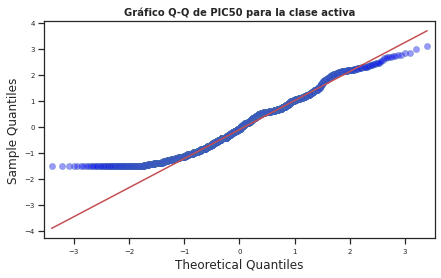

In [94]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df_2_activo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase activa', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Antes de empezar con un resultado formal, s epuede analizar el QQ-plot para 
analizar si los cuantiles o percentiles muestrales coinciden con los cuantiles teóricos de la distribución normal 

Se puede apreciar que  empíricamente los cuantiles muestrales de **PIC50** de la clase **activa** no se ajustan bien a los cuantiles teóricos de la distribución normal 

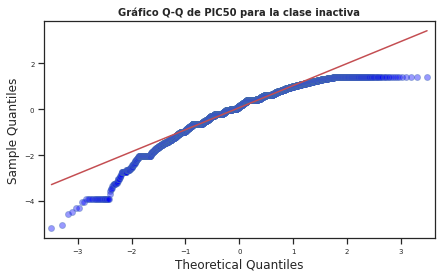

In [95]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df_2_inactivo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase inactiva', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Se puede apreciar que  empíricamente los cuantiles muestrales de **PIC50** de la clase **inactiva** no se ajustan bien a los cuantiles teóricos de la distribución normal 

In [96]:
# Test de Shapiro-Wilk  (clase activa)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_activo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.9632550477981567, pvalue=8.68832989120154e-27)

En este caso el $$p-valor=8.68832989120154*10^{-27}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=8.68832989120154*10^{-27}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

**Mann-Whitney U Test**

In [97]:
# Test de Shapiro-Wilk  (clase inactiva)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_inactivo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.9327073097229004, pvalue=1.5192948015132883e-39)

En este caso el $$p-valor=1.5192948015132883*10^{-39}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=1.5192948015132883*10^{-39}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

In [98]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  activo = df[df['valor_bioactividad'] == 'activo']
  activo = activo[descriptor]

  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  inactivo = df[df['valor_bioactividad'] == 'inactivo']
  inactivo = inactivo[descriptor]

# compare samples
  stat, p = mannwhitneyu(activo, inactivo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    resultado = 'Misma distribución (no rechazar H0)'
  else:
    resultado = 'Diferente distribución (rechazar H0)'
  
  results = pd.DataFrame({'Variable':descriptor,
                          'Resultado':stat,
                          'p-value':p,
                          'alpha':alpha,
                          'Interpretación':resultado}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [99]:
mannwhitney('Peso_Molecular')

,Variable,Resultado,p-value,alpha,Interpretación
0,Peso_Molecular,7827110.0,1.289794e-98,0.05,Diferente distribución (rechazar H0)


In [100]:
mannwhitney('LogP')

,Variable,Resultado,p-value,alpha,Interpretación
0,LogP,7061780.0,3.555595e-33,0.05,Diferente distribución (rechazar H0)


In [101]:
mannwhitney('Num_Donadores_H')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Donadores_H,5646852.0,5.102116e-07,0.05,Diferente distribución (rechazar H0)


In [102]:
mannwhitney('Num_Aceptores')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Aceptores,6454628.0,0.000001,0.05,Diferente distribución (rechazar H0)


## **Zip files**

In [103]:
# Test de Shapiro-Wilk  (clase inactiva)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_inactivo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.9327073097229004, pvalue=1.5192948015132883e-39)

Teniendo en cuenta que se mostró que ninguna de las poblaciones es normal, no se puede aplicar el t-test para la diferencia de medias poblacionales puesto que este test exige que las muestras provengas de poblaciones normales que en este caso no se cumple. Teniendo esto en cuenta se va a usar un test no paramétrico donde lo supuestos poblacionales son mucho más flexibles al respeto y permite discernir si las distribuciones son iguales o no 

In [104]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_Peso_Molecular.csv (deflated 6%)
  adding: chagas_02_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_Peso_Molecular_vs_LogP.pdf (deflated 2%)
  adding: plot_MW.pdf (deflated 33%)
  adding: mannwhitneyu_Num_Aceptores.csv (deflated 6%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: grafica_categorias_bioactividad.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 34%)
  adding: mannwhitneyu_Num_Donadores_H.csv (deflated 7%)
  adding: chagas_03_bioactivity_data_curated.csv (deflated 81%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: chagas_05_bioactivity_data_2class_pIC50.csv (deflated 75%)
  adding: mannwhitneyu_LogP.csv (deflated 5%)
  adding: prueba_1.csv (deflated 76%)
  adding: chagas_04_bioactivity_data_3class_pIC50.csv (deflated 75%)
  adding: chagas_res_1.csv (deflated 95%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)


#PARTE 3: 

In [105]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-10-03 03:36:45--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-10-03 03:36:45--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.09s   

2022-10-03 03:36:46 (263 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-10-03 03:36:46--  https://github

In [106]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Cargar datos de bioactividad**

Descargue los datos de bioactividad seleccionados de ChEMBL que han sido preprocesados de las Partes 1 y 2 de esta serie de proyectos de bioinformática. Aquí usaremos el archivo **bioactivity_data_3class_pIC50.csv** que esencialmente contiene los valores de pIC50 que usaremos para construir un modelo de regresión.

In [107]:
df3 = pd.read_csv('chagas_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,0,CHEMBL280463,inactivo,CCCCCC(P(=O)(O)O)P(=O)(O)O,246.136,1.24820,4.0,2.0,4.154902
1,1,CHEMBL110971,inactivo,CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O,304.216,1.73850,5.0,3.0,4.154902
2,2,CHEMBL109374,inactivo,CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,330.298,4.64480,0.0,6.0,4.154902
3,3,CHEMBL109948,inactivo,CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC,386.406,6.20520,0.0,6.0,4.301030
4,4,CHEMBL111392,inactivo,CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O,302.244,2.80860,4.0,2.0,4.154902
...,...,...,...,...,...,...,...,...,...
7044,7044,CHEMBL4878985,inactivo,Cc1ccccc1C(=O)CCn1ccnc1,214.268,2.46452,0.0,3.0,4.669586
7045,7045,CHEMBL4853502,inactivo,O=C(CCn1ccnc1)c1cccc([N+](=O)[O-])c1,245.238,2.06430,0.0,5.0,4.665546
7046,7046,CHEMBL4854457,inactivo,O=C(CCn1ccnc1)c1ccc(Cl)c(F)c1,252.676,2.94860,0.0,3.0,4.632644
7047,7047,CHEMBL4863983,inactivo,COc1cc(OC)cc(C(=O)CCn2cnc3ccccc32)c1,310.353,3.32650,0.0,5.0,4.954677


In [108]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [109]:
! cat molecule.smi | head -5

CCCCCC(P(=O)(O)O)P(=O)(O)O	CHEMBL280463
CCCCCCCCC(O)(P(=O)(O)O)P(=O)(O)O	CHEMBL110971
CCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC	CHEMBL109374
CCCCCCCC(P(=O)(OCC)OCC)P(=O)(OCC)OCC	CHEMBL109948
CCCCCCCCCC(P(=O)(O)O)P(=O)(O)O	CHEMBL111392


In [110]:
! cat molecule.smi | wc -l

7049


## **Calcular fingerprints y descriptores**

In [111]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [112]:
! bash padel.sh

Processing CHEMBL280463 in molecule.smi (1/7049). 
Processing CHEMBL110971 in molecule.smi (2/7049). 
Processing CHEMBL109374 in molecule.smi (3/7049). Average speed: 8.11 s/mol.
Processing CHEMBL111392 in molecule.smi (5/7049). Average speed: 2.83 s/mol.
Processing CHEMBL109948 in molecule.smi (4/7049). Average speed: 4.10 s/mol.
Processing CHEMBL111695 in molecule.smi (6/7049). Average speed: 2.14 s/mol.
Processing CHEMBL52761 in molecule.smi (7/7049). Average speed: 1.76 s/mol.
Processing CHEMBL55264 in molecule.smi (9/7049). Average speed: 1.28 s/mol.
Processing CHEMBL299988 in molecule.smi (8/7049). Average speed: 1.48 s/mol.
Processing CHEMBL298547 in molecule.smi (10/7049). Average speed: 1.28 s/mol.
Processing CHEMBL113140 in molecule.smi (11/7049). Average speed: 1.03 s/mol.
Processing CHEMBL324003 in molecule.smi (12/7049). Average speed: 0.93 s/mol.
Processing CHEMBL55810 in molecule.smi (13/7049). Average speed: 0.86 s/mol.
Processing CHEMBL54004 in molecule.smi (14/7049). 

In [113]:
! ls -l

total 143960
-rw-r--r-- 1 root root   610731 Oct  3 03:35 chagas_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   550807 Oct  3 03:35 chagas_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   945562 Oct  3 03:36 chagas_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   945562 Oct  3 03:36 chagas_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root 10871110 Oct  3 03:34 chagas_res_1.csv
-rw-r--r-- 1 root root  1262246 Oct  3 03:38 descriptors_output.csv
-rw-r--r-- 1 root root    14463 Oct  3 03:36 grafica_categorias_bioactividad.pdf
drwxr-xr-x 3 root root     4096 Oct  3 03:36 __MACOSX
-rw-r--r-- 1 root root      132 Oct  3 03:36 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      141 Oct  3 03:36 mannwhitneyu_Num_Aceptores.csv
-rw-r--r-- 1 root root      143 Oct  3 03:36 mannwhitneyu_Num_Donadores_H.csv
-rw-r--r-- 1 root root      143 Oct  3 03:36 mannwhitneyu_Peso_Molecular.csv
-rw-r--r-- 1 root root  5371070 Oct  3 03:34 matriz
-rwxr-xr-x 1 root roo

## **Preparando las Matrices de Datos X e Y**

### **X matriz**

In [120]:
df3_X = pd.read_csv('descriptors_output.csv')

In [121]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL280463,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL110971,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL109374,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL109948,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL111392,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,CHEMBL273027,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,CHEMBL272043,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,CHEMBL410324,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,CHEMBL271134,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df3_X = df3_X.drop(columns=['Name'])
df3_X
df3_X.shape

(704, 881)

## **Y variable**

In [123]:
df3_Y = df3['pIC50']
df3_Y

0       4.154902
1       4.154902
2       4.154902
3       4.301030
4       4.154902
          ...   
7044    4.669586
7045    4.665546
7046    4.632644
7047    4.954677
7048    4.605548
Name: pIC50, Length: 7049, dtype: float64

## **Unir datasets**





In [124]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.154902
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.154902
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.154902
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.154902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.669586
7045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.665546
7046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.632644
7047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.954677


In [126]:
dataset3 = pd.read_csv('chagas_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
dataset3.to_csv('chagas_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

#PARTE 4

## **Importar librerías**

In [127]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [128]:
df = pd.read_csv('chagas_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.shape

(7049, 882)

## **Fingerprints**
Esta enferemedad contiene 881 descriptores.

### **Variables de entrada**

In [129]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7045,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7046,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7047,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Variable respuesta**

In [130]:
Y = df.pIC50
Y

0       4.154902
1       4.154902
2       4.154902
3       4.301030
4       4.154902
          ...   
7044    4.669586
7045    4.665546
7046    4.632644
7047    4.954677
7048    4.605548
Name: pIC50, Length: 7049, dtype: float64

### **Eliminar varianzas muy bajas**

In [131]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [132]:
#resultado
X.shape

(7049, 165)

## **Dividir conjunto de datos en 80% y 20%**

In [133]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [134]:
X_train.shape, Y_train.shape

((5639, 165), (5639,))

In [135]:
X_test.shape, Y_test.shape

((1410, 165), (1410,))

## **Modelo de Regresión Lineal usando Random Forest**

In [136]:
#model = RandomForestRegressor(n_estimators=100)
import numpy as np

model = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=0, criterion='squared_error',  min_samples_split=2)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6231465922780398

In [137]:
model.estimators_

[DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1478610112),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1537364731),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1491434855),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1819583497),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=626

In [138]:
Y_pred = model.predict(X_test)

In [139]:
# #Hyper parameters range intialization for tuning 

# parameters={
#             "random_state": [None], 
#             "max_depth" : [ None],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.0,0.1],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90,100] }

# # calculating different regression metrics

# from sklearn.model_selection import GridSearchCV

# tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)



# # function for calculating how much time take for hyperparameter tuning

# def timer(start_time=None):
#     if not start_time:
#         start_time=datetime.now()
#         return start_time
#     elif start_time:
#         thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#         tmin,tsec=divmod(temp_sec,60)
#         #print(thour,":",tmin,':',round(tsec,2))

# X10 = df.iloc[:,:-1]
# Y10 = df.iloc[:,-1]



# from datetime import datetime

# start_time=timer(None)

# tuning_model.fit(X10, Y10)

# timer(start_time)

In [140]:
from sklearn.tree import DecisionTreeRegressor 
  
model1 = DecisionTreeRegressor(random_state=8, max_depth=10, max_leaf_nodes=100, min_samples_leaf=4, splitter='random')
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

#r2 = model1.score(X_test, Y_test)

score = model1.score(X_test, Y_test)
print(score)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,8), dpi=150)
# plot_tree(model, feature_names=X.columns)

0.443583264416347


In [141]:
#Modelo No2
from sklearn import linear_model
modelo2=linear_model.LinearRegression()
modelo2.fit(X_train,Y_train)
modelo2.predict(X_test)

modelo2.score(X_test,Y_test)

0.08309204280677862

In [142]:
#otro modelo usando redes neuronales
from sklearn.neural_network import MLPRegressor
Modelo3=MLPRegressor(random_state=1,max_iter=90).fit(X_train,Y_train)
Modelo3.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.5469973243137546

In [143]:
Modelo3.predict(X_test)

array([4.44614888, 4.83846196, 7.51053814, ..., 4.67735556, 6.00364938,
       4.66423544])

In [144]:
#Modelo bayesiano
from sklearn import linear_model
from os import X_OK
modelo4=linear_model.BayesianRidge()
modelo4.fit(X_train,Y_train)
modelo4.predict(X_test)

array([5.27163351, 5.16553901, 7.27787138, ..., 4.52062675, 5.89099994,
       3.79475834])

In [145]:
modelo4.score(X_test,Y_test)

0.3500249052395562

## **Graficar valores Experimental vs predicho para valores de pIC50**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

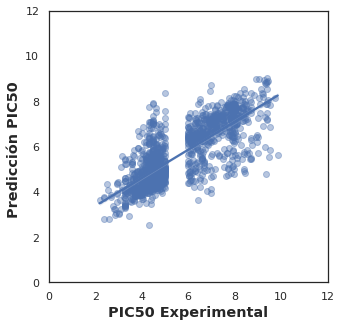

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('PIC50 Experimental', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicción PIC50 ', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [147]:
! unzip padel.zip -y

Archive:  padel.zip
caution: filename not matched:  -y


##Implementar Segundos descriptores

In [148]:
!pip install rdkit-pypi
!pip install mordred

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors


def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df3_selection['canonical_smiles'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rdkit_pypi-2022.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.8 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /root/.cache/pip/wheels/02/c0/2e/e7e3d63b431777712ebc128bc4deb9ac5cb19afc7c1ea341ec/mordred-1.2.0-py3-none-any.whl
     |████████████████████████████████| 1.9 MB 30.3 MB/s 


In [149]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.564147,-6.236107,12.564147,3.424503,0.413781,246.136,230.008,246.042211,86,0,...,0,0,0,0,0,0,0,0,0,0
1,13.003939,-6.574381,13.003939,3.459601,0.323140,304.216,282.040,304.084076,110,0,...,0,0,0,0,0,0,0,0,0,0
2,14.637075,-7.945234,14.637075,4.104634,0.485272,330.298,302.074,330.136112,122,0,...,0,0,0,0,0,0,0,0,0,0
3,15.133406,-8.394247,15.133406,4.115497,0.232086,386.406,350.118,386.198712,146,0,...,0,0,0,0,0,0,0,0,0,0
4,12.891734,-6.535287,12.891734,3.425265,0.364169,302.244,278.052,302.104812,110,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,13.003921,-3.718290,13.003921,0.021761,0.732665,214.268,200.156,214.110613,82,0,...,0,0,0,0,0,0,0,0,0,0
7045,12.770587,-3.707150,12.770587,0.009274,0.458587,245.238,234.150,245.080041,92,0,...,0,0,0,0,0,0,0,0,0,0
7046,13.940450,-3.620983,13.940450,0.049954,0.784456,252.676,242.596,252.046569,88,0,...,0,0,0,0,0,0,0,0,0,0
7047,13.562701,-3.933992,13.562701,0.073286,0.655370,310.353,292.209,310.131742,118,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [151]:
Morgan_fpts = morgan_fpts(df3_selection['canonical_smiles'])
Morgan_fpts.shape

(7049, 2048)

In [152]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
Morgan_fingerprints.to_csv('Morgan_fingerprints.csv', index=False)

In [154]:
dataset5 = pd.concat([Morgan_fingerprints,df3_Y], axis=1)
dataset5

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.154902
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.154902
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.154902
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.154902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.669586
7045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.665546
7046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.632644
7047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.954677


In [155]:
dataset5.to_csv('chagas_07_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [156]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [157]:
df4 = pd.read_csv('chagas_07_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [158]:
X4 = df4.drop('pIC50', axis=1)
X4

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
Y4 = df4.pIC50
Y4

0       4.154902
1       4.154902
2       4.154902
3       4.301030
4       4.154902
          ...   
7044    4.669586
7045    4.665546
7046    4.632644
7047    4.954677
7048    4.605548
Name: pIC50, Length: 7049, dtype: float64

In [160]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X4 = selection.fit_transform(X4)

In [161]:
#resultado
X4.shape
X4

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [162]:
#dividir conjunto de datos 80/20
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2,random_state=10)

In [163]:
model = RandomForestRegressor(n_estimators=60, max_depth=14, random_state=0,  min_samples_split=4)
model.fit(X4_train, Y4_train)
r2 = model.score(X4_test, Y4_test)
r2

0.5375338936776184

In [164]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(df3_selection['canonical_smiles'])

In [166]:
mordred_descriptors.to_csv('mordred_descriptors_chagas.csv', index = False)

NameError: ignored